In [2]:
#Load libraries
import os
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from fancyimpute import KNN

In [3]:
#Set working directory
os.chdir("F:\project2")

In [4]:
#Load data
absent = pd.read_excel("Absent.xls")

In [5]:
# Shape Dataframe
absent.shape

(740, 21)

In [6]:
# Checking Dataframe
absent.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


## Missing Value Analysis


In [7]:
# #Create dataframe with missing percentage
missing_val = pd.DataFrame(absent.isnull().sum())

# #Reset index
missing_val = missing_val.reset_index()

# #Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

# #Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(absent))*100

# #descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

# #save output results 
 #missing_val.to_csv("Miising_perc.csv", inex = False)

In [8]:
missing_val

,Variables,Missing_percentage
0,Body mass index,4.189189
1,Absenteeism time in hours,2.972973
2,Height,1.891892
3,Work load Average/day,1.351351
4,Education,1.351351
5,Transportation expense,0.945946
6,Son,0.810811
7,Disciplinary failure,0.810811
8,Hit target,0.810811
9,Social smoker,0.540541


In [9]:
absent.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [10]:
# Those variables whose values are same for same value of 'ID'
same=['Distance from Residence to Work','Age','Transportation expense','Service time',
      'Education','Son','Social drinker','Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']

In [11]:
# Imptuting those variable whose values are same for particular employee(i.e those column values which remain same for same "ID" value)

for a in same :
     #   Getting All ID's where particular variable value is missing
     #   Getting All index values where  particular variable value is missing and it corresponds to all ID's value 

   val_id=absent[absent[a].isnull()]['ID']
   val_index=val_id.index
   val_id=list(val_id)
    
   
   for c,d in zip(val_id,val_index):
    y=absent[(absent['ID']==c) & (absent[a].notnull())][a]
    
    
    #  all values are same but still took mode here
    y=y.mode()

    # imputing value at location of missing value for particular variable
    absent.loc[d,a]=y[0]
 

Putting zero category of 'Reason.for.absence' column equal to 26(i.e. unjustified absence).

In [12]:
absent.loc[absent['Reason for absence']==0,'Reason for absence']=26 

Using 'Reason.for.absence' for imputing missing values in 'Absenteeism.time.in.hours'

In [13]:
for i in range(1,29):
    absent.loc[(absent['Absenteeism time in hours'].isnull()) & (absent['Reason for absence']==i),'Absenteeism time in hours'] = absent.loc[absent['Reason for absence']==i,'Absenteeism time in hours'].median()

In [14]:
#Apply KNN imputation algorithm for reaming varible
absent = pd.DataFrame(KNN(k = 3).fit_transform(absent), columns = absent.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.273
Imputing row 101/740 with 0 missing, elapsed time: 0.289
Imputing row 201/740 with 0 missing, elapsed time: 0.290
Imputing row 301/740 with 0 missing, elapsed time: 0.291
Imputing row 401/740 with 0 missing, elapsed time: 0.291
Imputing row 501/740 with 0 missing, elapsed time: 0.291
Imputing row 601/740 with 0 missing, elapsed time: 0.291
Imputing row 701/740 with 0 missing, elapsed time: 0.291


In [15]:
# categorical varibles (variables which are categorical but already encoded here)
categor=['ID','Reason for absence', 'Month of absence', 'Day of the week','Seasons','Disciplinary failure',
         'Education', 'Social drinker','Social smoker']

In [16]:
#Convert into proper datatypes
 # as no numerica data is in decimal and all categorical data needed to be round off after KNN for getting correct category value
for i in absent.columns:            
    absent.loc[:,i] = absent.loc[:,i].round()
for i in categor:
    absent.loc[:,i] = absent.loc[:,i].astype('category')

In [17]:
# Checking data types 
for i in absent.columns:
    print(i)
    print(absent[i].dtype)

ID
category
Reason for absence
category
Month of absence
category
Day of the week
category
Seasons
category
Transportation expense
float64
Distance from Residence to Work
float64
Service time
float64
Age
float64
Work load Average/day 
float64
Hit target
float64
Disciplinary failure
category
Education
category
Son
float64
Social drinker
category
Social smoker
category
Pet
float64
Weight
float64
Height
float64
Body mass index
float64
Absenteeism time in hours
float64


# Relationships of categorical independent variables with dependent variable

In [18]:
def relation(a):
    plt.clf()
    df = absent.groupby(a)['Absenteeism time in hours'].sum()
    df = df.reset_index()
    df['Absenteeism time in hours'] = (df['Absenteeism time in hours']*100)/sum(absent['Absenteeism time in hours'])
    df = df.sort_values(by=['Absenteeism time in hours'])
    print(a)
    print(df)
    return df.plot.barh(x=a,y='Absenteeism time in hours', figsize = (12,10))

In [19]:
categor = ['ID','Reason for absence', 'Month of absence', 'Day of the week','Seasons','Disciplinary failure',
         'Education', 'Social drinker','Social smoker']

ID
      ID  Absenteeism time in hours
34  35.0                   0.000000
3    4.0                   0.000000
7    8.0                   0.000000
18  19.0                   0.117786
20  21.0                   0.314095
15  16.0                   0.314095
31  32.0                   0.314095
30  31.0                   0.314095
28  29.0                   0.412250
1    2.0                   0.490773
26  27.0                   0.530035
29  30.0                   0.608559
11  12.0                   0.667452
22  23.0                   0.785238
24  25.0                   0.824499
5    6.0                   1.413428
32  33.0                   1.433059
25  26.0                   1.629368
4    5.0                   2.041618
17  18.0                   2.316451
0    1.0                   2.375344
16  17.0                   2.473498
6    7.0                   2.944641
12  13.0                   3.435414
9   10.0                   3.651355
23  24.0                   4.907735
21  22.0                 

<Figure size 432x288 with 0 Axes>

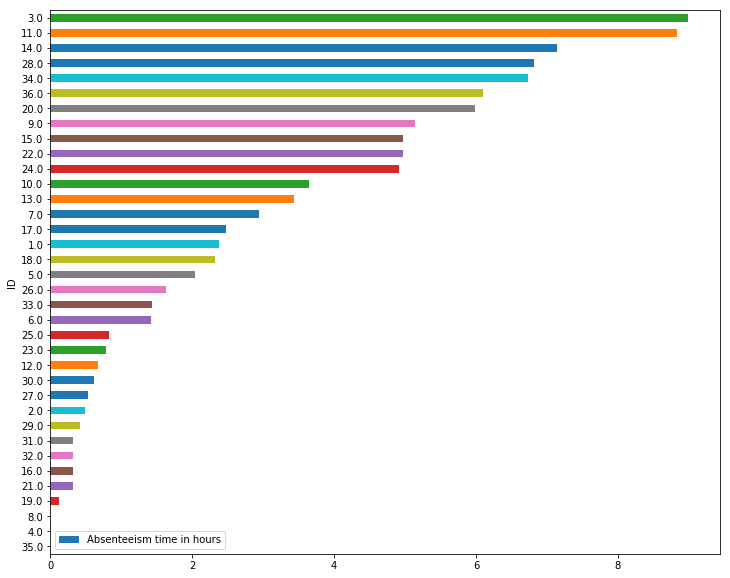

In [20]:
relation("ID")

Reason for absence
   Reason for absence  Absenteeism time in hours
15               16.0                   0.117786
16               17.0                   0.157048
2                 3.0                   0.157048
19               20.0                   0.157048
3                 4.0                   0.176678
14               15.0                   0.314095
4                 5.0                   0.372988
1                 2.0                   0.471143
23               24.0                   0.471143
7                 8.0                   0.628190
20               21.0                   0.687083
24               25.0                   2.120141
6                 7.0                   2.944641
26               27.0                   3.140950
13               14.0                   3.199843
8                 9.0                   3.297998
5                 6.0                   3.356890
0                 1.0                   3.572831
10               11.0                   3.631724
1

<Figure size 432x288 with 0 Axes>

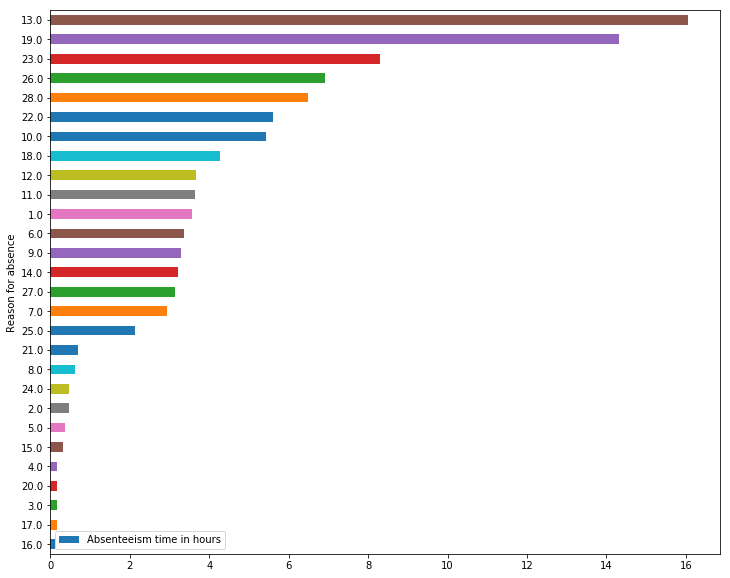

In [21]:
relation('Reason for absence')

Month of absence
   Month of absence  Absenteeism time in hours
0               0.0                   0.000000
1               1.0                   4.358068
8               8.0                   5.653710
9               9.0                   5.732234
2               2.0                   5.771496
10             10.0                   6.811936
12             12.0                   7.656066
5               5.0                   7.852375
6               6.0                   8.068316
11             11.0                   9.285434
4               4.0                   9.462112
7               7.0                  14.330585
3               3.0                  15.017668


<Figure size 432x288 with 0 Axes>

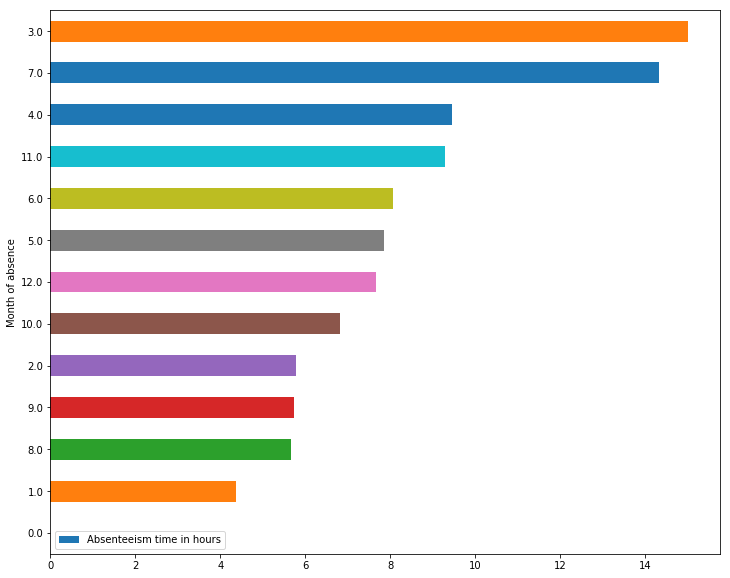

In [22]:
relation('Month of absence')

Day of the week
  Day of the week  Absenteeism time in hours
3             5.0                  10.855909
4             6.0                  14.232430
2             4.0                  21.888496
1             3.0                  25.991362
0             2.0                  27.031802


<Figure size 432x288 with 0 Axes>

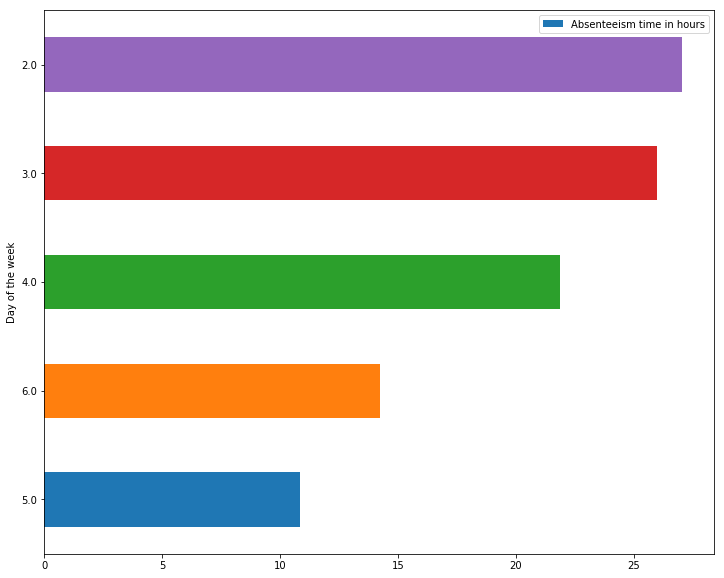

In [23]:
relation('Day of the week')

Seasons
  Seasons  Absenteeism time in hours
1     2.0                  22.614841
3     4.0                  23.812328
0     1.0                  24.283471
2     3.0                  29.289360


<Figure size 432x288 with 0 Axes>

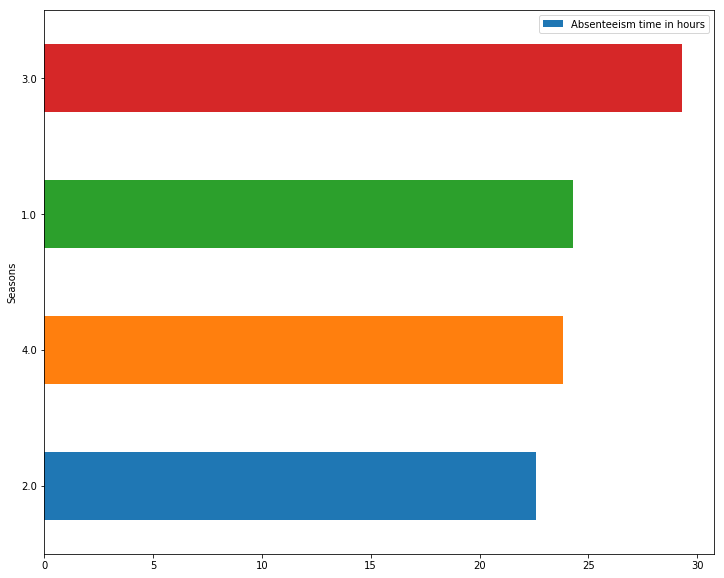

In [24]:
relation('Seasons')

Disciplinary failure
  Disciplinary failure  Absenteeism time in hours
1                  1.0                   2.355713
0                  0.0                  97.644287


<Figure size 432x288 with 0 Axes>

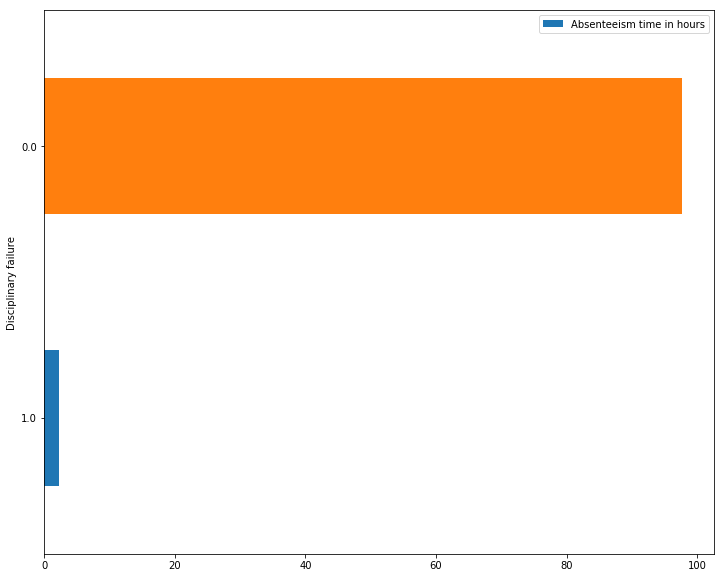

In [25]:
relation('Disciplinary failure')

Education
  Education  Absenteeism time in hours
3       4.0                   0.412250
1       2.0                   5.771496
2       3.0                   8.166470
0       1.0                  85.649784


<Figure size 432x288 with 0 Axes>

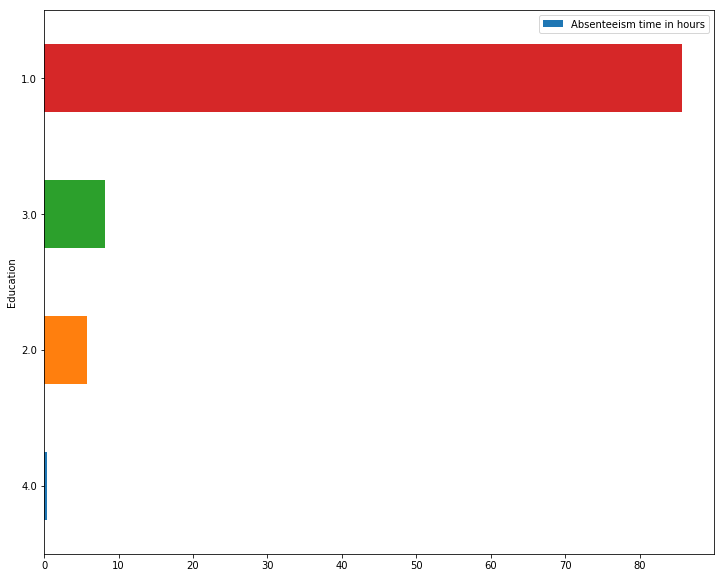

In [26]:
relation('Education')

Social drinker
  Social drinker  Absenteeism time in hours
0            0.0                   37.23989
1            1.0                   62.76011


<Figure size 432x288 with 0 Axes>

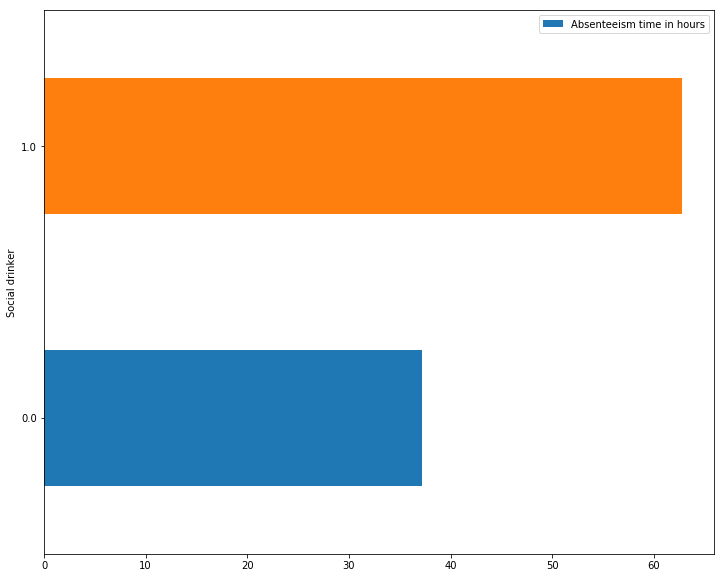

In [27]:
relation('Social drinker')

Social smoker
  Social smoker  Absenteeism time in hours
1           1.0                   9.246172
0           0.0                  90.753828


<Figure size 432x288 with 0 Axes>

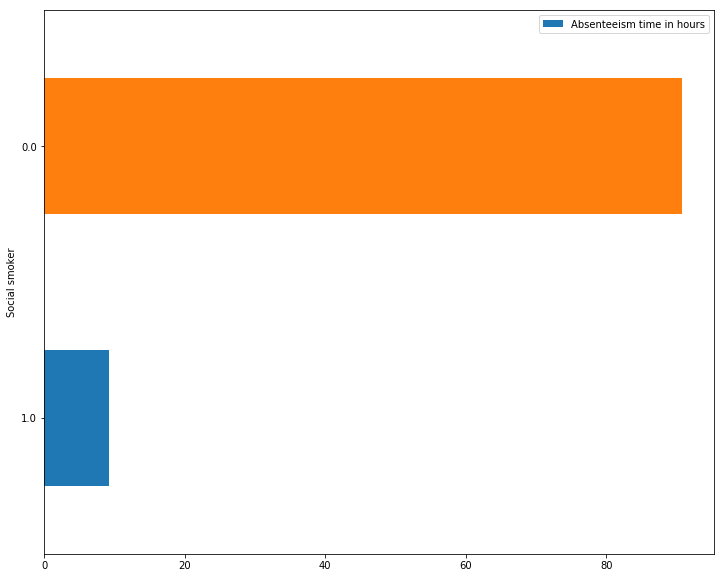

In [28]:
relation('Social smoker')

In [29]:
 #  numeric value
cnames =  ['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',  'Son', 'Pet', 'Weight', 'Height', 'Body mass index']

C:\Users\dgnc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dgnc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


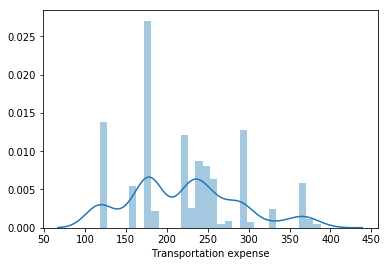

In [30]:
sns.distplot(absent['Transportation expense'],bins=30)

C:\Users\dgnc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dgnc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


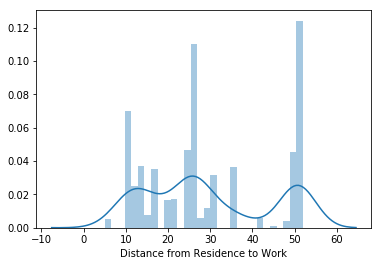

In [31]:
sns.distplot(absent['Distance from Residence to Work'],bins=30)

C:\Users\dgnc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dgnc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


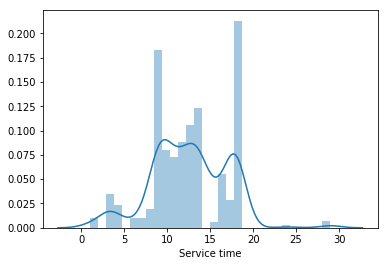

In [32]:
sns.distplot(absent['Service time'],bins=30)

C:\Users\dgnc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dgnc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


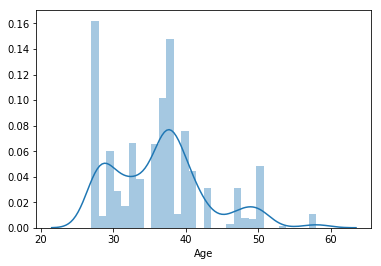

In [33]:
sns.distplot(absent['Age'],bins=30)

C:\Users\dgnc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dgnc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


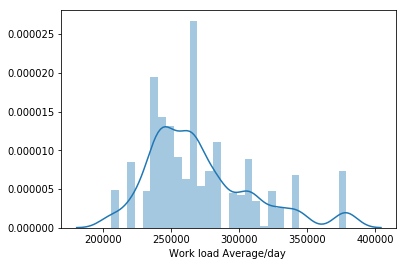

In [34]:
sns.distplot(absent['Work load Average/day '],bins=30)

C:\Users\dgnc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dgnc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


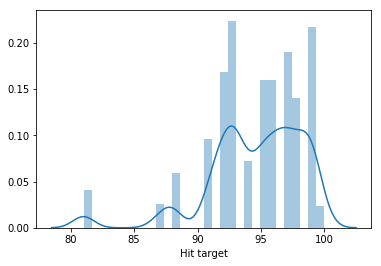

In [35]:
sns.distplot(absent['Hit target'],bins=30)

C:\Users\dgnc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dgnc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


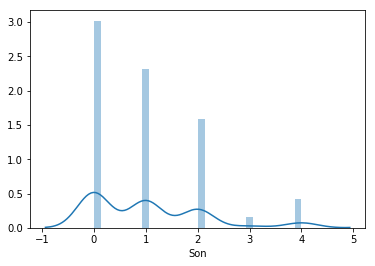

In [36]:
sns.distplot(absent['Son'],bins=30)

C:\Users\dgnc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dgnc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


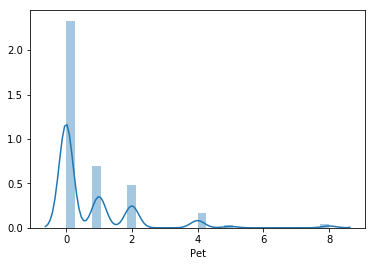

In [37]:
sns.distplot(absent['Pet'],bins=30)

C:\Users\dgnc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dgnc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


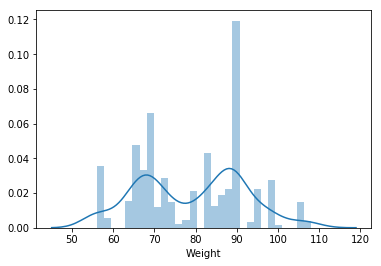

In [38]:
sns.distplot(absent['Weight'],bins=30)

C:\Users\dgnc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dgnc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


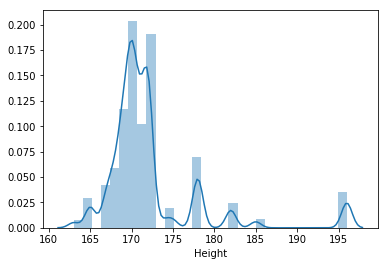

In [39]:
sns.distplot(absent['Height'],bins=30)

C:\Users\dgnc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dgnc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


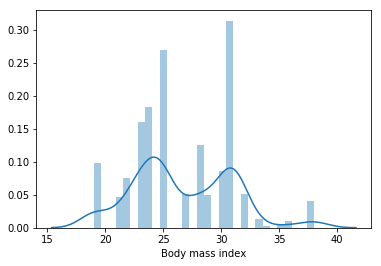

In [40]:
sns.distplot(absent['Body mass index'],bins=30)

C:\Users\dgnc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\dgnc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


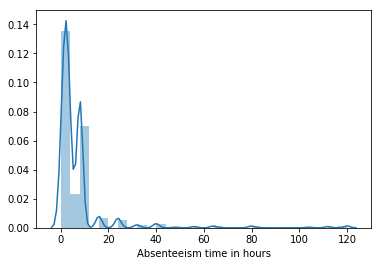

In [41]:
sns.distplot(absent['Absenteeism time in hours'],bins=30)

## Outlier Analysis

In [42]:
df1 = absent.copy()
#absent = df1.copy()

In [43]:
 #  numeric value
cnames =  ['Transportation expense', 'Distance from Residence to Work','Service time', 'Age', 
           'Work load Average/day ', 'Hit target',  'Son', 'Pet', 'Weight', 'Height', 'Body mass index']

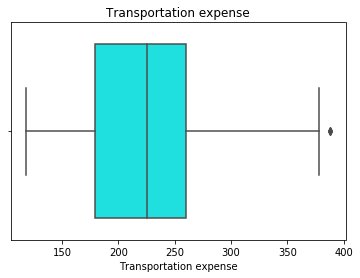

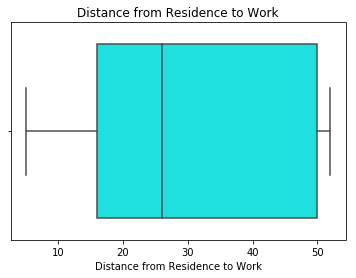

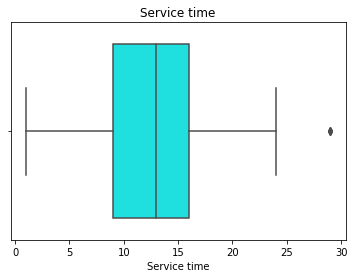

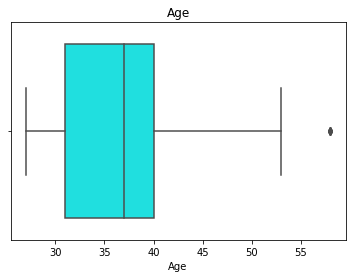

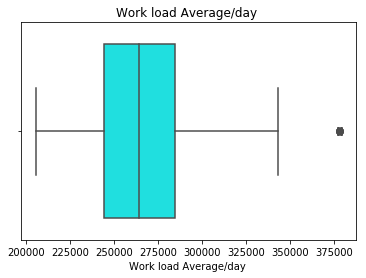

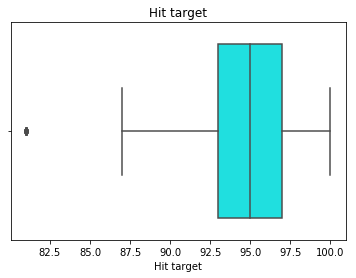

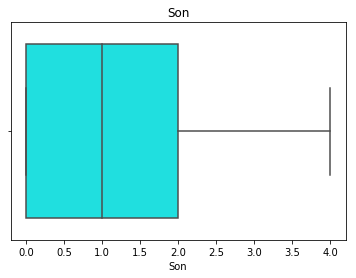

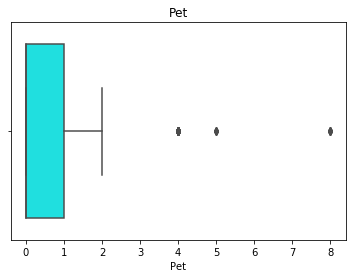

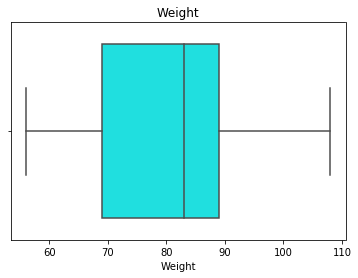

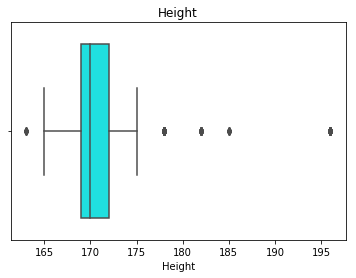

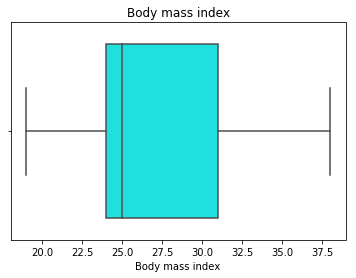

In [44]:
#   Plotting Box Plot
for i in cnames:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(absent[i],color="cyan")
    plt.title(i)
    plt.show()

In [45]:
 #  numeric value
cnames =  ['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',  'Son', 'Pet', 'Weight', 'Height', 'Body mass index']

In [46]:
#   numeric values for outlier analysis
cnames1 =  [ 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',  'Son', 'Weight', 'Body mass index']

In [47]:
#absent = df.copy()

In [48]:
# Detect and Delete outliers from data
for i in cnames1:
    print(i)
    q75, q25 = np.percentile(absent.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    absent = absent.drop(absent[absent.loc[:,i] < min].index)
    absent = absent.drop(absent[absent.loc[:,i] > max].index)   

#  Imputing outliers after exploratory data analysis   
absent.loc[(absent['Height']>182),'Height']=182
absent.loc[(absent['Pet']>4),'Pet']=4

Transportation expense
57.5
381.5
Distance from Residence to Work
-35.0
101.0
Service time
-1.5
26.5
Age
17.5
53.5
Work load Average/day 
183688.0
345552.0
Hit target
87.0
103.0
Son
-3.0
5.0
Weight
39.0
119.0
Body mass index
13.5
41.5


In [176]:
#Detect and replace with NA
# #Extract quartiles
for i in cnames:
    print(i)
    q75, q25 = np.percentile(absent.loc[:,i], [75 ,25]) 

# #Calculate IQR
    iqr = q75 - q25

# #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(minimum)
    print(maximum)
# #Replace with NA
       
    absent.loc[absent[i]< minimum , i]=np.nan
    absent.loc[absent[i]> maximum , i]=np.nan

# #Calculate missing value
pd.DataFrame(absent.isnull().sum())

# #Impute with KNN
#customer_train = pd.DataFrame(KNN(k = 3).complete(customer_train), columns = mcustomer_train.columns)

Transportation expense
57.5
381.5
Distance from Residence to Work
-35.0
101.0
Service time
-1.5
26.5
Age
17.5
53.5
Work load Average/day 
183688.0
345552.0
Hit target
87.0
103.0
Son
-3.0
5.0
Pet
-1.5
2.5
Weight
39.0
119.0
Height
164.5
176.5
Body mass index
13.5
41.5


,0
ID,0
Reason for absence,0
Month of absence,0
Day of the week,0
Seasons,0
Transportation expense,3
Distance from Residence to Work,0
Service time,5
Age,8
Work load Average/day,31


In [190]:
#   Detect outlier using Z score method
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [191]:
for i in cnames:
    out1=[]
    outliers=[]
    print(i)
    out1=detect_outlier(absent[i])
    print(len(out1)) 
    print(out1)
  

Transportation expense
0
[]
Distance from Residence to Work
0
[]
Service time
5
[29.0, 29.0, 29.0, 29.0, 29.0]
Age
8
[58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0]
Work load Average/day 
0
[]
Hit target
19
[81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0]
Son
0
[]
Pet
14
[5.0, 5.0, 5.0, 5.0, 5.0, 8.0, 8.0, 8.0, 8.0, 5.0, 8.0, 8.0, 8.0, 8.0]
Weight
0
[]
Height
29
[196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0, 196.0]
Body mass index
0
[]


## Feature Selection

In [49]:
##Correlation analysis
#Correlation plot
df_corr = absent.loc[:,cnames]

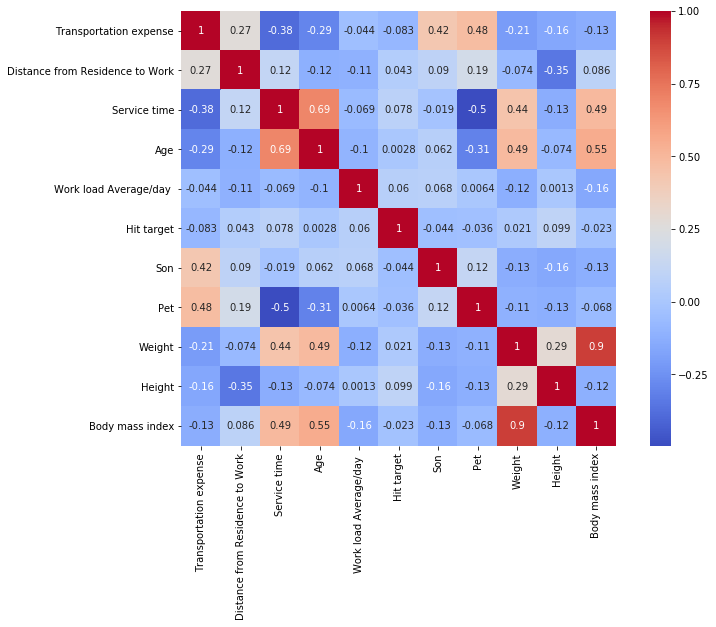

In [50]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(12, 8))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='coolwarm',annot=True,
            square=True, ax=ax)

In [51]:
#Chi Square test
#Save categorical variables
cat2 = ['ID','Reason for absence', 'Month of absence', 'Day of the week','Seasons','Disciplinary failure',
         'Education', 'Social drinker','Social smoker']

In [52]:
#chi square test

factors_paired = [(i,j) for i in cat2 for j in cat2] 
chi2, p_values =[], []
for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(absent[f[0]], absent[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)

p1 = np.array(p_values).reshape((9,9))
p1 = pd.DataFrame(p1, index=cat2, columns=cat2)
p1

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Social drinker,Social smoker
ID,0.000000e+00,4.108190e-44,7.723765e-79,0.000065,8.649479e-07,1.068402e-05,0.000000e+00,5.240102e-121,1.110115e-121
Reason for absence,4.108190e-44,0.000000e+00,8.002549e-14,0.044816,9.743721e-18,6.209839e-47,3.019780e-10,1.411095e-08,1.441534e-07
Month of absence,7.723765e-79,8.002549e-14,0.000000e+00,0.597895,0.000000e+00,1.173244e-03,9.182166e-04,3.125854e-02,5.008804e-02
Day of the week,6.469442e-05,4.481559e-02,5.978949e-01,0.000000,2.077837e-01,5.804799e-01,5.979612e-01,6.519246e-01,8.217987e-01
Seasons,8.649479e-07,9.743721e-18,0.000000e+00,0.207784,0.000000e+00,1.596185e-05,3.483862e-02,2.431226e-01,1.015022e-01
Disciplinary failure,1.068402e-05,6.209839e-47,1.173244e-03,0.580480,1.596185e-05,0.000000e+00,4.803712e-01,2.477535e-01,2.774606e-02
Education,0.000000e+00,3.019780e-10,9.182166e-04,0.597961,3.483862e-02,4.803712e-01,0.000000e+00,2.407969e-34,5.715478e-21
Social drinker,5.240102e-121,1.411095e-08,3.125854e-02,0.651925,2.431226e-01,2.477535e-01,2.407969e-34,0.000000e+00,7.626547e-03
Social smoker,1.110115e-121,1.441534e-07,5.008804e-02,0.821799,1.015022e-01,2.774606e-02,5.715478e-21,7.626547e-03,0.000000e+00


In [53]:
# Feature Importance with Random Forest Regressor
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
X = absent.iloc[:,0:20]
Y = absent.iloc[:,20]
# feature extraction
model = RandomForestRegressor(n_estimators = 1000)
model.fit(X, Y)
prob=model.feature_importances_
for a,b in zip(X.columns,prob) :
    print(a)
    print(b)
sel = SelectFromModel( RandomForestRegressor(n_estimators = 1000))
sel.fit(X,Y)
sel.get_support()


C:\Users\dgnc\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


ID
0.03970567671293659
Reason for absence
0.22014351817761135
Month of absence
0.0979927204915171
Day of the week
0.07369999772788126
Seasons
0.05081257585407998
Transportation expense
0.05026676171589403
Distance from Residence to Work
0.1013435934563045
Service time
0.0137445155335237
Age
0.03095845167699737
Work load Average/day 
0.13241774849364726
Hit target
0.06210839858569935
Disciplinary failure
0.01312968871470251
Education
0.003366808821992606
Son
0.01953887801468923
Social drinker
0.008109743160489635
Social smoker
0.0026551015532524434
Pet
0.011065599773050407
Weight
0.039792101078828884
Height
0.01482127338111166
Body mass index
0.01432684707579053


array([False,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False])

In [54]:
# Dropping Variables 
absent = absent.drop(['Body mass index', 'Education', 'Social drinker','Social smoker','Disciplinary failure',
                      'Service time', 'Age', 'Son', 'Pet', 'Weight', 'Height','Seasons' ], axis=1)

In [55]:
absent.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Transportation expense', 'Distance from Residence to Work',
       'Work load Average/day ', 'Hit target', 'Absenteeism time in hours'],
      dtype='object')

In [56]:
absent.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Work load Average/day,Hit target,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,289.0,36.0,239554.0,97.0,4.0
1,36.0,26.0,7.0,3.0,118.0,13.0,239554.0,97.0,0.0
2,3.0,23.0,7.0,4.0,179.0,51.0,239554.0,97.0,2.0
3,7.0,7.0,7.0,5.0,279.0,5.0,239554.0,97.0,4.0
4,11.0,23.0,7.0,5.0,289.0,36.0,239554.0,97.0,2.0


In [57]:
#saving train data after pre processing
absent.to_csv("absent.csv",index=False)

In [67]:
absent=pd.read_csv('absent.csv')

In [58]:
df3=absent.copy()
#absent=df3.copy()

# Model Development

In [59]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Work load Average/day,Hit target,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,289.0,36.0,239554.0,97.0,4.0
1,36.0,26.0,7.0,3.0,118.0,13.0,239554.0,97.0,0.0
2,3.0,23.0,7.0,4.0,179.0,51.0,239554.0,97.0,2.0
3,7.0,7.0,7.0,5.0,279.0,5.0,239554.0,97.0,4.0
4,11.0,23.0,7.0,5.0,289.0,36.0,239554.0,97.0,2.0


In [60]:
# creating a copy of absent dataframe
absent1=absent.copy()
absent.shape

(676, 9)

In [61]:
# dropping the observations where month of absence is equal to 0
absent1 = absent1.drop(absent1[absent1['Month of absence']==0].index)

 creating a new variable month_no which increases with every next month that comes .This is done so that data
 can be arranged in proper sequence because no year variable is provided,therefore we cant compare dates here as month of   absence(1-12) repeats itself after every 12 months.
  As first month that comes in data is july i.e month =7 .Therfore we will start with month_no=7 and increase it with every next
 month that comes in data

In [62]:
absent1['month_no']=7

In [63]:
absent1.loc[0:18,'month_no']=7
absent1.loc[236:251,'month_no']=19
absent1.loc[460:479,'month_no']=31
absent1.loc[725:736,'month_no']=43

In [64]:
absent1.loc[19:39,'month_no']=8
absent1.loc[252:269,'month_no']=20
absent1.loc[480:494,'month_no']=32

In [65]:
absent1.loc[40:61,'month_no']=9
absent1.loc[270:288,'month_no']=21
absent1.loc[495:506,'month_no']=33

In [66]:
absent1.loc[62:79,'month_no']=10
absent1.loc[289:316,'month_no']=22
absent1.loc[507:531,'month_no']=34

In [67]:
absent1.loc[80:97,'month_no']=11
absent1.loc[317:338,'month_no']=23
absent1.loc[532:554,'month_no']=35

In [68]:
absent1.loc[98:112,'month_no']=12
absent1.loc[339:357,'month_no']=24
absent1.loc[555:569,'month_no']=36

In [69]:
absent1.loc[113:136,'month_no']=13
absent1.loc[358:368,'month_no']=25
absent1.loc[570:584,'month_no']=37

In [70]:
absent1.loc[137:154,'month_no']=14
absent1.loc[369:389,'month_no']=26
absent1.loc[585:617,'month_no']=38

In [71]:
absent1.loc[155:183,'month_no']=15
absent1.loc[390:411,'month_no']=27
absent1.loc[618:653,'month_no']=39

In [72]:
absent1.loc[184:203,'month_no']=16
absent1.loc[412:424,'month_no']=28
absent1.loc[654:673,'month_no']=40

In [73]:
absent1.loc[204:219,'month_no']=17
absent1.loc[425:440,'month_no']=29
absent1.loc[674:705,'month_no']=41

In [74]:
absent1.loc[220:235,'month_no']=18
absent1.loc[441:459,'month_no']=30
absent1.loc[706:724,'month_no']=42

In [75]:
absent1.shape

(673, 10)

In [76]:
absent1=absent1.drop(['Month of absence'],axis=1)

In [77]:
absent1.columns

Index(['ID', 'Reason for absence', 'Day of the week', 'Transportation expense',
       'Distance from Residence to Work', 'Work load Average/day ',
       'Hit target', 'Absenteeism time in hours', 'month_no'],
      dtype='object')

In [78]:
# basic Feature Engineering

absent2 = absent1.copy()
absent2['Last_month_absent'] = absent2.groupby(['Reason for absence'])['Absenteeism time in hours'].shift()
absent2['Last_month_Diff'] = absent2.groupby(['Reason for absence'])['Last_month_absent'].diff()
absent2 = absent2.dropna()
absent2.head()

,ID,Reason for absence,Day of the week,Transportation expense,Distance from Residence to Work,Work load Average/day,Hit target,Absenteeism time in hours,month_no,Last_month_absent,Last_month_Diff
5,3.0,23.0,6.0,179.0,51.0,239554.0,97.0,2.0,7,2.0,0.0
7,20.0,23.0,6.0,260.0,50.0,239554.0,97.0,4.0,7,2.0,0.0
14,3.0,23.0,4.0,179.0,51.0,239554.0,97.0,4.0,7,4.0,2.0
16,3.0,23.0,6.0,179.0,51.0,239554.0,97.0,2.0,7,4.0,0.0
18,6.0,11.0,5.0,189.0,29.0,239554.0,97.0,8.0,7,1.0,-7.0


In [79]:
# Error metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from math import sqrt
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))
def rmse(ytrue,ypred):
    return np.sqrt(mean_squared_error(ytrue,ypred))

In [80]:
# setting Baseline 
mean_error = []
for month in range(30,44):
    train = absent2[absent2['month_no'] < month]
    val = absent2[absent2['month_no'] == month]
    
    p = val['Last_month_absent'].values
    
    error = rmsle(val['Absenteeism time in hours'].values, p)
    print('month %d - Error %.5f' % (month, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

month 30 - Error 1.07451
month 31 - Error 0.62986
month 32 - Error 0.82970
month 33 - Error 0.80748
month 34 - Error 0.87290
month 35 - Error 0.42685
month 36 - Error 1.17229
month 37 - Error 1.11548
month 38 - Error 0.50181
month 39 - Error 0.83439
month 40 - Error 0.78824
month 41 - Error 1.00974
month 42 - Error 0.88074
month 43 - Error 1.23777
Mean Error = 0.87013


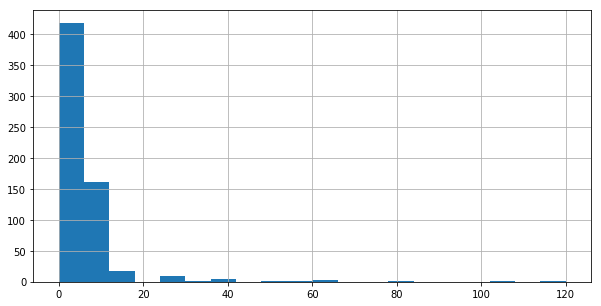

In [81]:
absent2['Absenteeism time in hours'].hist(bins=20, figsize=(10,5))

In [82]:
# creating Model using Random forest

from sklearn.ensemble import RandomForestRegressor
mean_error = []
for month in range(30,44):
    train = absent2[absent2['month_no'] < month]
    val = absent2[absent2['month_no'] == month]
    
    xtr, xts = train.drop(['Absenteeism time in hours'], axis=1), val.drop(['Absenteeism time in hours'], axis=1)
    ytr, yts = train['Absenteeism time in hours'].values, val['Absenteeism time in hours'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = rmsle(yts, p)
    print('month %d - Error %.5f' % (month, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

month 30 - Error 0.81608
month 31 - Error 0.95667
month 32 - Error 0.59812
month 33 - Error 0.66766
month 34 - Error 0.68925
month 35 - Error 0.96420
month 36 - Error 0.88103
month 37 - Error 0.69309
month 38 - Error 0.52340
month 39 - Error 0.61791
month 40 - Error 0.79865
month 41 - Error 0.88338
month 42 - Error 0.95116
month 43 - Error 0.86958
Mean Error = 0.77930


In [83]:
# basic Feature Engineering again increasing the number of shifts and diff
absent3 = absent1.copy()
absent3['Last_month_absent'] = absent3.groupby(['Reason for absence','ID'])['Absenteeism time in hours'].shift()
absent3['Last_month_Diff'] = absent3.groupby(['Reason for absence','ID'])['Last_month_absent'].diff()
absent3['Last-1_month_absent'] = absent3.groupby(['Reason for absence','ID'])['Absenteeism time in hours'].shift(2)
absent3['Last-1_month_Diff'] = absent3.groupby(['Reason for absence','ID'])['Last-1_month_absent'].diff()
absent3['Last-2_month_absent'] = absent3.groupby(['Reason for absence','ID'])['Absenteeism time in hours'].shift(3)
absent3['Last-2_month_Diff'] = absent3.groupby(['Reason for absence','ID'])['Last-2_month_absent'].diff()
absent3 = absent3.dropna()
absent3.head()

,ID,Reason for absence,Day of the week,Transportation expense,Distance from Residence to Work,Work load Average/day,Hit target,Absenteeism time in hours,month_no,Last_month_absent,Last_month_Diff,Last-1_month_absent,Last-1_month_Diff,Last-2_month_absent,Last-2_month_Diff
29,3.0,23.0,6.0,179.0,51.0,205917.0,92.0,2.0,8,2.0,-2.0,4.0,2.0,2.0,0.0
34,3.0,23.0,2.0,179.0,51.0,205917.0,92.0,2.0,8,2.0,0.0,2.0,-2.0,4.0,2.0
42,3.0,23.0,3.0,179.0,51.0,241476.0,92.0,4.0,9,2.0,0.0,2.0,0.0,2.0,-2.0
46,3.0,23.0,3.0,179.0,51.0,241476.0,92.0,3.0,9,4.0,2.0,2.0,0.0,2.0,0.0
57,3.0,23.0,4.0,179.0,51.0,241476.0,92.0,3.0,9,3.0,-1.0,4.0,2.0,2.0,0.0


In [84]:
# creating Model using Random forest

from sklearn.ensemble import RandomForestRegressor
mean_error = []
for month in range(30,44):
    train = absent3[absent3['month_no'] < month]
    val = absent3[absent3['month_no'] == month]
    
    xtr, xts = train.drop(['Absenteeism time in hours'], axis=1), val.drop(['Absenteeism time in hours'], axis=1)
    ytr, yts = train['Absenteeism time in hours'].values, val['Absenteeism time in hours'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, np.log1p(ytr))
    
    p = np.expm1(mdl.predict(xts))
    
    error = rmsle(yts, p)
    print('month %d - Error %.5f' % (month, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

month 30 - Error 0.61069
month 31 - Error 0.47354
month 32 - Error 0.35819
month 33 - Error 0.47349
month 34 - Error 0.38847
month 35 - Error 1.01589
month 36 - Error 0.55634
month 37 - Error 0.28217
month 38 - Error 0.21883
month 39 - Error 0.60494
month 40 - Error 0.20875
month 41 - Error 0.56640
month 42 - Error 0.14942
month 43 - Error 0.13001
Mean Error = 0.43122


In [85]:
# feature engineering increasing number of shifts(data as lag as of previous 8 months is included) in data and
#calculating diff of these shifts

absent4 = absent1.copy()
#
absent4['Last_month_absent'] = absent4.groupby(['Reason for absence',"ID"])['Absenteeism time in hours'].shift()
absent4['Last_month_Diff'] = absent4.groupby(['Reason for absence','ID'])['Last_month_absent'].diff()
#
for i in range(1,8):
    absent4['Last-'+str(i)+'_month_absent'] = absent4.groupby(['Reason for absence','ID'])['Absenteeism time in hours'].shift(i+1)
    absent4['Last-'+str(i)+'_month_Diff'] = absent4.groupby(['Reason for absence','ID'])['Last-'+str(i)+'_month_absent'].diff()

absent4 = absent4.dropna()
absent4.head()

,ID,Reason for absence,Day of the week,Transportation expense,Distance from Residence to Work,Work load Average/day,Hit target,Absenteeism time in hours,month_no,Last_month_absent,...,Last-3_month_absent,Last-3_month_Diff,Last-4_month_absent,Last-4_month_Diff,Last-5_month_absent,Last-5_month_Diff,Last-6_month_absent,Last-6_month_Diff,Last-7_month_absent,Last-7_month_Diff
60,3.0,23.0,6.0,179.0,51.0,241476.0,92.0,3.0,9,3.0,...,2.0,0.0,2.0,0.0,2.0,-2.0,4.0,2.0,2.0,0.0
62,3.0,23.0,3.0,179.0,51.0,253465.0,93.0,3.0,10,3.0,...,4.0,2.0,2.0,0.0,2.0,0.0,2.0,-2.0,4.0,2.0
66,3.0,23.0,6.0,179.0,51.0,253465.0,93.0,3.0,10,3.0,...,3.0,-1.0,4.0,2.0,2.0,0.0,2.0,0.0,2.0,-2.0
72,3.0,23.0,4.0,179.0,51.0,253465.0,93.0,8.0,10,3.0,...,3.0,0.0,3.0,-1.0,4.0,2.0,2.0,0.0,2.0,0.0
80,3.0,23.0,5.0,179.0,51.0,306345.0,93.0,1.0,11,8.0,...,3.0,0.0,3.0,0.0,3.0,-1.0,4.0,2.0,2.0,0.0


In [86]:
# creating Model using Random forest

from sklearn.ensemble import RandomForestRegressor
mean_error = []
for month in range(32,44):
    train = absent4[absent4['month_no'] < month]
    val = absent4[absent4['month_no'] == month]
    
    xtr, xts = train.drop(['Absenteeism time in hours'], axis=1), val.drop(['Absenteeism time in hours'], axis=1)
    ytr, yts = train['Absenteeism time in hours'].values, val['Absenteeism time in hours'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    p = mdl.predict(xts)
    total=p.sum()
   

    error = rmsle(yts, p)

    print('month %d - Error %.5f - total absent hours %.2f' % (month, error,total))
   
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

month 32 - Error 0.17898 - total absent hours 3.78
month 33 - Error 0.62291 - total absent hours 18.16
month 34 - Error 0.28408 - total absent hours 12.63
month 35 - Error 0.48577 - total absent hours 13.27
month 36 - Error 0.26452 - total absent hours 17.15
month 37 - Error 0.29403 - total absent hours 5.43
month 38 - Error 0.13188 - total absent hours 31.70
month 39 - Error 0.59615 - total absent hours 79.09
month 40 - Error 0.15444 - total absent hours 2.50
month 41 - Error 0.30405 - total absent hours 21.01
month 42 - Error 0.14431 - total absent hours 9.72
month 43 - Error 0.41664 - total absent hours 11.99
Mean Error = 0.32315


In [87]:
# Final Model
# creating Model using Random forest taking log of input variable

from sklearn.ensemble import RandomForestRegressor

mean_error = []
total_hours_pred=[]
total_hours_actual=[]

for month in range(32,44):
    train = absent4[absent4['month_no'] < month]
    val = absent4[absent4['month_no'] == month]
    
    xtr, xts = train.drop(['Absenteeism time in hours'], axis=1), val.drop(['Absenteeism time in hours'], axis=1)
    ytr, yts = train['Absenteeism time in hours'].values, val['Absenteeism time in hours'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, np.log1p(ytr))
    
    totalA=yts.sum()
    total_hours_actual.append(totalA)
    
    p = np.expm1(mdl.predict(xts))
    total=p.sum()
    total_hours_pred.append(total)
    
    error = rmsle(yts, p)

    print('month %d - Error %.5f - total absent hours %.2f' % (month, error,total))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

month 32 - Error 0.12313 - total absent hours 3.52
month 33 - Error 0.38978 - total absent hours 11.06
month 34 - Error 0.20932 - total absent hours 7.45
month 35 - Error 0.38837 - total absent hours 11.04
month 36 - Error 0.27719 - total absent hours 13.73
month 37 - Error 0.38891 - total absent hours 4.57
month 38 - Error 0.13012 - total absent hours 31.14
month 39 - Error 0.35370 - total absent hours 58.46
month 40 - Error 0.13730 - total absent hours 2.44
month 41 - Error 0.32625 - total absent hours 18.25
month 42 - Error 0.17491 - total absent hours 8.96
month 43 - Error 0.49608 - total absent hours 9.39
Mean Error = 0.28292


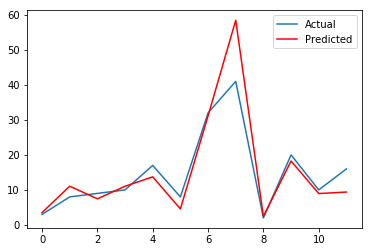

In [88]:
fig , ax =plt.subplots()
ax.plot(total_hours_actual,label='Actual')
ax.plot(total_hours_pred, color='red',label='Predicted')
leg=ax.legend();

In [89]:
# creating Model using Gradient boosting 
import lightgbm as lgb
total_hours = []
mean_error = []
for month in range(32,44):
    train = absent4[absent4['month_no'] < month]
    val = absent4[absent4['month_no'] == month]
    
    xtr, xts = train.drop(['Absenteeism time in hours'], axis=1), val.drop(['Absenteeism time in hours'], axis=1)
    ytr, yts = train['Absenteeism time in hours'].values, val['Absenteeism time in hours'].values
    
    mdl = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.01)
    mdl.fit(xtr, np.log1p(ytr))
    
    p = np.expm1(mdl.predict(xts))
    total=p.sum()
    total_hours.append(total)
    error = rmsle(yts, p)
    print('month %d - Error %.5f - total absent hours %.2f' % (month, error,total))
    
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

month 32 - Error 0.20492 - total absent hours 3.91
month 33 - Error 0.51560 - total absent hours 13.43
month 34 - Error 0.43315 - total absent hours 4.95
month 35 - Error 0.39714 - total absent hours 9.25
month 36 - Error 0.25798 - total absent hours 16.06
month 37 - Error 0.24017 - total absent hours 5.86
month 38 - Error 0.22301 - total absent hours 32.01
month 39 - Error 0.44608 - total absent hours 68.98
month 40 - Error 0.12996 - total absent hours 2.42
month 41 - Error 0.35505 - total absent hours 16.69
month 42 - Error 0.26801 - total absent hours 7.14
month 43 - Error 0.45201 - total absent hours 9.73
Mean Error = 0.32692


In [90]:
# creating Model using Ada Boosting
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
mean_error = []
total_hours= []
for month in range(32,44):
    train = absent4[absent4['month_no'] < month]
    val = absent4[absent4['month_no'] == month]
    
    xtr, xts = train.drop(['Absenteeism time in hours'], axis=1), val.drop(['Absenteeism time in hours'], axis=1)
    ytr, yts = train['Absenteeism time in hours'].values, val['Absenteeism time in hours'].values
    
    mdl =  AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=1000, random_state=0)

    mdl.fit(xtr, np.log1p(ytr))
    
    p = np.expm1(mdl.predict(xts))
    total=p.sum()
    total_hours.append(total)
    error = rmsle(yts, p)
    print('month %d - Error %.5f - total absent hours %.2f' % (month, error,total))
    
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

month 32 - Error 0.08926 - total absent hours 3.37
month 33 - Error 0.45348 - total absent hours 13.34
month 34 - Error 0.10738 - total absent hours 9.29
month 35 - Error 0.49067 - total absent hours 11.92
month 36 - Error 0.24718 - total absent hours 17.42
month 37 - Error 0.47244 - total absent hours 3.92
month 38 - Error 0.12814 - total absent hours 29.52
month 39 - Error 0.24607 - total absent hours 52.61
month 40 - Error 0.07192 - total absent hours 2.22
month 41 - Error 0.30651 - total absent hours 17.46
month 42 - Error 0.19120 - total absent hours 8.37
month 43 - Error 0.59320 - total absent hours 7.80
Mean Error = 0.28312


### Modifying above model to Forecast Total number of absent hours of employees for the next 12 months

In [91]:
#  Creating a copy of dataframe
absent5=absent1.copy()

In [92]:
# grouping by month_no
absent5=absent5.groupby(['month_no']).sum()

In [93]:
# Dropping variables
absent5=absent5.drop([ 'Transportation expense','Distance from Residence to Work', 'Work load Average/day ',
       'Hit target'],axis=1)

In [94]:
# reseting Index
absent5=absent5.reset_index(level='month_no')

In [95]:
absent5

,month_no,Absenteeism time in hours
0,7,125.0
1,8,140.0
2,9,88.0
3,10,73.0
4,11,161.0
5,12,177.0
6,13,60.0
7,14,71.0
8,15,281.0
9,16,194.0


In [96]:
from sklearn.ensemble import RandomForestRegressor
mean_error = []
total_hours_pred=[]
total_hours_actual=[]

absent7 =pd.DataFrame(columns=["month_no","Absenteeism time in hours"])

for month in range(32,56):
    if (month>43) :
        absent5.loc[len(absent5)]=[month,0]
   
    # Calculating lags and difference    
   
    absent6 = absent5.copy()

    absent6['Last_month_absent'] = absent6['Absenteeism time in hours'].shift()
    absent6['Last_month_Diff'] = absent6['Last_month_absent'].diff()

    for i in range(1,12):
        absent6['Last-'+str(i)+'_month_absent'] = absent6['Absenteeism time in hours'].shift(i+1)
        absent6['Last-'+str(i)+'_month_Diff'] = absent6['Last-'+str(i)+'_month_absent'].diff()

    absent6 = absent6.dropna()    
   
    # Dividing data into train and validation 
    
    train = absent6[absent6['month_no'] < month]
    val = absent6[absent6['month_no'] == month]
    
    xtr, xts = train.drop(['Absenteeism time in hours'], axis=1), val.drop(['Absenteeism time in hours'], axis=1)
    ytr, yts = train['Absenteeism time in hours'].values, val['Absenteeism time in hours'].values
    
    #  Training Model
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, np.log1p(ytr))
    
    
    total_hours_actual.append(yts)
    
    # making Prediction
    p = np.expm1(mdl.predict(xts))

    total_hours_pred.append(p)
    if (month>43):
        absent5.loc[(len(absent5)-1),"Absenteeism time in hours"]=p
        absent7.loc[len(absent7)]=[month,p]
    
    #  Checking Error
    if (month<44):
        error = rmsle(yts, p)
        print('month %d - Error %.5f - actual %.2f - pred %.2f' % (month, error,yts,p))
        mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))


month 32 - Error 0.53596 - actual 76.00 - pred 130.60
month 33 - Error 1.15397 - actual 41.00 - pred 132.17
month 34 - Error 0.00363 - actual 92.00 - pred 92.34
month 35 - Error 0.03269 - actual 99.00 - pred 102.32
month 36 - Error 0.05367 - actual 144.00 - pred 152.00
month 37 - Error 0.25568 - actual 80.00 - pred 103.60
month 38 - Error 0.17270 - actual 101.00 - pred 84.82
month 39 - Error 0.80209 - actual 240.00 - pred 107.06
month 40 - Error 0.01730 - actual 114.00 - pred 116.01
month 41 - Error 1.01566 - actual 234.00 - pred 84.11
month 42 - Error 0.29068 - actual 98.00 - pred 131.40
month 43 - Error 0.42889 - actual 136.00 - pred 88.22
Mean Error = 0.39691


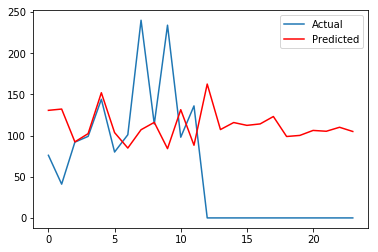

In [97]:
fig , ax =plt.subplots()
ax.plot(total_hours_actual,label='Actual')
ax.plot(total_hours_pred, color='red',label='Predicted')
leg=ax.legend();

In [98]:
### Total number of employee absent hours forecasted for the next 12 months

absent7['Absenteeism time in hours']=absent7['Absenteeism time in hours'].astype(int)
absent7

,month_no,Absenteeism time in hours
0,44,162
1,45,107
2,46,115
3,47,112
4,48,114
5,49,123
6,50,98
7,51,100
8,52,106
9,53,105
